# Ungraded Lab: A/B Testing Lab

## Overview 
Welcome to EngageMetrics' Digital Marketing team! We're investigating how different marketing channels impact user engagement on our platform. In this lab, you'll analyze real user interaction data to help optimize our marketing strategy. Using Python's statistical testing libraries, you'll compare engagement metrics across different marketing channels to determine which drives the highest user engagement.

This hands-on experience mirrors the actual analysis process our team uses to make data-driven marketing decisions. The skills you'll practice are essential for any data scientist working on conversion optimization and user engagement analysis.

## Learning Outcomes 
By the end of this lab, you will be able to:
- Conduct exploratory analysis on A/B test data using Python
- Apply statistical testing to compare user engagement metrics
- Create visualizations to communicate A/B test results
- Draw data-driven conclusions about marketing channel effectiveness

## Dataset Information
We'll be working with the <b>AB_test_user_engagement.csv</b> dataset, which contains:
- User engagement metrics (clicks, time_spent)
- User demographics (age, location)
- Marketing channel information
- Test group assignments (A/B)
- Account details (type, plan)

## Activities 
### Activity 1: Data Exploration and Preparation 
Let's start by understanding our user engagement data.

<b>Step 1:</b> Load and inspect the data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('AB_test_user_engagement.csv')

# Display first few rows and basic information
# YOUR CODE HERE


<b>Step 2:</b> Examine data quality

In [2]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# View basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Distribution of users across test groups
# YOUR CODE HERE



Missing Values:
user_id              0
group                0
clicks               0
time_spent           0
device               0
age                  0
location             0
browser_type         0
account_type         0
plan                 0
product_category     0
marketing_channel    0
dtype: int64

Basic Statistics:
           user_id       clicks   time_spent          age
count  1000.000000  1000.000000  1000.000000  1000.000000
mean    500.500000     2.963000    14.843244    43.336000
std     288.819436     1.680612     4.973645    14.964593
min       1.000000     0.000000    -0.883519    18.000000
25%     250.750000     2.000000    11.662609    31.000000
50%     500.500000     3.000000    14.971212    43.000000
75%     750.250000     4.000000    18.300507    56.000000
max    1000.000000     9.000000    30.564551    69.000000


<b>Tip:</b> Pay special attention to the 'clicks' and 'time_spent' columns - these are our key metrics for measuring engagement.

### Activity 2: Initial Analysis 
Compare engagement metrics between test groups to identify potential differences.

<b>Step 1:</b> Calculate baseline metrics

In [3]:
# Calculate average engagement metrics by group
group_metrics = df.groupby('group').agg({
    'clicks': ['mean', 'count'],
    'time_spent': ['mean', 'count']
})

<b>Step 2:</b> Visualize distributions of clicks and time spent

In [4]:
# Create side-by-side boxplots
# YOUR CODE HERE 


<b>Tip:</b> Look for obvious differences between groups before conducting statistical tests.

### Activity 3: Statistical Testing 
Now let's determine if the differences we observed are statistically significant.

<b>Step 1:</b> Formulate hypothesis

In [5]:
# For each marketing channel, we'll test:
# H0: No difference in engagement between groups A and B
# H1: There is a difference in engagement between groups A and B

<b>Step 2:</b> Conduct statistical tests

In [6]:
# Perform t-test for each marketing channel

channels = df['marketing_channel'].unique()
test_results = []

for channel in channels:
    channel_data = df[df['marketing_channel'] == channel]

    # Test for clicks
    clicks_a = channel_data[channel_data['group'] == 'A']['clicks']
    clicks_b = channel_data[channel_data['group'] == 'B']['clicks']
    t_stat_clicks, p_value_clicks = stats.ttest_ind(clicks_a, clicks_b)

    # Test for time spent
    time_a = channel_data[channel_data['group'] == 'A']['time_spent']
    time_b = channel_data[channel_data['group'] == 'B']['time_spent']
    t_stat_time, p_value_time = stats.ttest_ind(time_a, time_b)

    test_results.append({
        'channel': channel,
        'clicks_t_stat': t_stat_clicks,
        'clicks_p_value': p_value_clicks,
        'time_t_stat': t_stat_time,
        'time_p_value': p_value_time
    })

# Create results DataFrame
results_df = pd.DataFrame(test_results)
print("\nStatistical Test Results:")
print(results_df)


Statistical Test Results:
        channel  clicks_t_stat  clicks_p_value  time_t_stat  time_p_value
0  Social Media       1.619906        0.106272    -1.117874      0.264489
1      Paid Ads      -2.263664        0.024225     0.991636      0.322080
2      Referral       0.663622        0.507376    -0.629758      0.529270


### Activity 4: Results Analysis and Visualization 
Let's create clear visualizations to communicate our findings.

<b>Step 1:</b> Create summary visualization

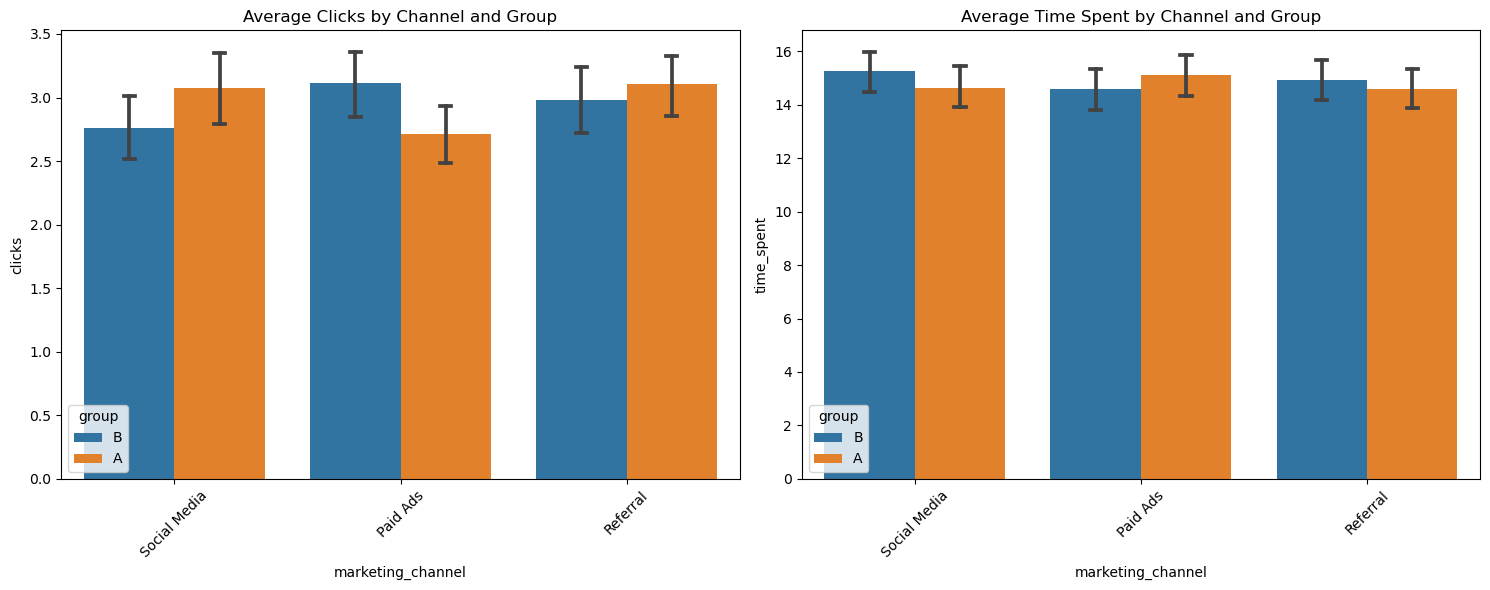

In [7]:
# Create bar plot with confidence intervals for clicks and time-spent
# Create summary visualization
plt.figure(figsize=(15, 6))

# Plot clicks
plt.subplot(1, 2, 1)
sns.barplot(
    x='marketing_channel',
    y='clicks',
    hue='group',
    data=df,
    ci=95,
    capsize=0.05
)
plt.title('Average Clicks by Channel and Group')
plt.xticks(rotation=45)

# Plot time spent
plt.subplot(1, 2, 2)
sns.barplot(
    x='marketing_channel',
    y='time_spent',
    hue='group',
    data=df,
    ci=95,
    capsize=0.05
)
plt.title('Average Time Spent by Channel and Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Success Checklist
- Successfully loaded and explored the dataset
- Identified patterns in engagement metrics across groups
- Conducted appropriate statistical tests
- Created clear visualizations of results
- Drew meaningful conclusions from the analysis

## Common Issues & Solutions 
- Problem: Uneven sample sizes between groups 
    - Solution: Use appropriate statistical tests that account for unequal sample sizes
- Problem: Outliers affecting results 
    - Solution: Consider using non-parametric tests or removing outliers with justification

## Summary 
In this lab, you've mastered conducting A/B tests using Python by analyzing EngageMetrics' marketing channel effectiveness through user engagement data. Through hands-on practice with statistical testing and data visualization, you've developed the essential skills needed to make data-driven decisions about marketing strategy optimization.

### Key Points
- Understanding of A/B testing methodology 
- Practical experience with statistical analysis in Python 
- Data visualization best practices 
- Clear result interpretation and communication

## Solution Code
Stuck on your code or want to check your solution? Here's a complete reference implementation to guide you. This represents just one effective approach—try solving independently first, then use this to overcome obstacles or compare techniques. The solution is provided to help you move forward and explore alternative approaches to achieve the same results. Happy coding!


### Activity 1: Data Exploration and Preparation - Solution Code

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load and inspect data
df = pd.read_csv('AB_test_user_engagement.csv')

# Display first few rows and basic information
print(df.head())

# Display basic information
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Distribution of test groups
print("\nTest Group Distribution:")
print(df['group'].value_counts())

   user_id group  clicks  time_spent   device  age location browser_type  \
0      522     B       5   18.168305  Desktop   45    Urban      Firefox   
1      738     B       3   11.509002  Desktop   19    Rural       Safari   
2      741     A       1   23.393373  Desktop   27    Urban      Firefox   
3      661     B       4    5.441797   Mobile   39    Urban       Safari   
4      412     B       4   21.555837  Desktop   30    Urban       Chrome   

  account_type        plan product_category marketing_channel  
0      Premium       Basic      Electronics      Social Media  
1      Premium  Enterprise         Clothing          Paid Ads  
2      Premium         Pro      Electronics          Referral  
3         Free  Enterprise         Clothing          Paid Ads  
4      Premium       Basic            Books      Social Media  
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count 

### Activity 2: Initial Analysis - Solution Code

Group Metrics:
         clicks                 time_spent                
           mean       std count       mean       std count
group                                                     
A      2.967557  1.674490   524  14.778884  5.056893   524
B      2.957983  1.689073   476  14.914093  4.884692   476


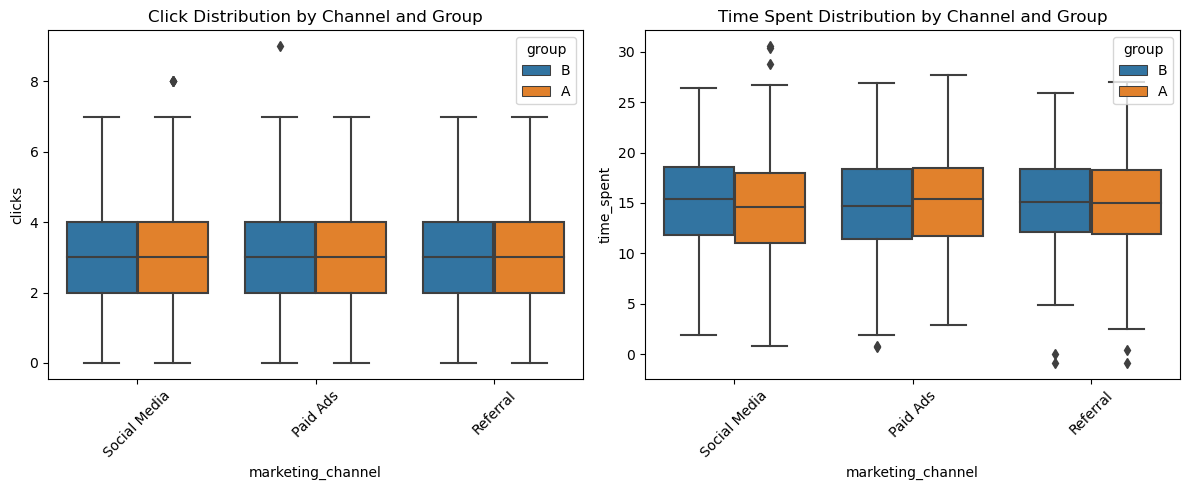

In [9]:
# Calculate baseline metrics
group_metrics = df.groupby('group').agg({
    'clicks': ['mean', 'std', 'count'],
    'time_spent': ['mean', 'std', 'count']
})

print("Group Metrics:")
print(group_metrics)

# Visualize distributions
plt.figure(figsize=(12, 5))

# Clicks distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='marketing_channel', y='clicks', hue='group', data=df)
plt.title('Click Distribution by Channel and Group')
plt.xticks(rotation=45)

# Time spent distribution
plt.subplot(1, 2, 2)
sns.boxplot(x='marketing_channel', y='time_spent', hue='group', data=df)
plt.title('Time Spent Distribution by Channel and Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Activity 3: Statistical Testing - Solution Code

In [10]:
# Perform t-tests for each marketing channel
channels = df['marketing_channel'].unique()
test_results = []

for channel in channels:
    channel_data = df[df['marketing_channel'] == channel]
    
    # Test for clicks
    clicks_a = channel_data[channel_data['group'] == 'A']['clicks']
    clicks_b = channel_data[channel_data['group'] == 'B']['clicks']
    t_stat_clicks, p_value_clicks = stats.ttest_ind(clicks_a, clicks_b)
    
    # Test for time spent
    time_a = channel_data[channel_data['group'] == 'A']['time_spent']
    time_b = channel_data[channel_data['group'] == 'B']['time_spent']
    t_stat_time, p_value_time = stats.ttest_ind(time_a, time_b)
    
    test_results.append({
        'channel': channel,
        'clicks_t_stat': t_stat_clicks,
        'clicks_p_value': p_value_clicks,
        'time_t_stat': t_stat_time,
        'time_p_value': p_value_time
    })

# Create results DataFrame
results_df = pd.DataFrame(test_results)
print("\nStatistical Test Results:")
print(results_df)


Statistical Test Results:
        channel  clicks_t_stat  clicks_p_value  time_t_stat  time_p_value
0  Social Media       1.619906        0.106272    -1.117874      0.264489
1      Paid Ads      -2.263664        0.024225     0.991636      0.322080
2      Referral       0.663622        0.507376    -0.629758      0.529270


### Activity 4: Results Analysis and Visualization - Solution Code

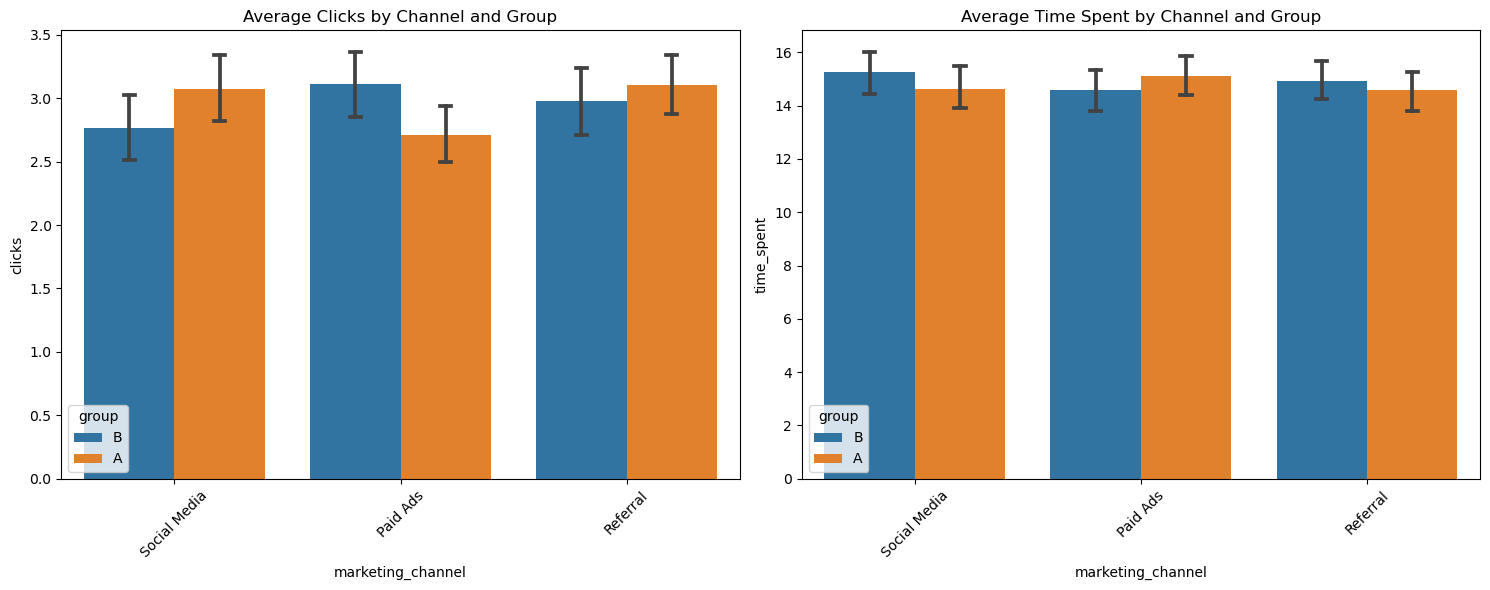

In [11]:
# Create summary visualization
plt.figure(figsize=(15, 6))

# Plot clicks
plt.subplot(1, 2, 1)
sns.barplot(x='marketing_channel', y='clicks', hue='group', data=df,
            ci=95, capsize=0.05)
plt.title('Average Clicks by Channel and Group')
plt.xticks(rotation=45)

# Plot time spent
plt.subplot(1, 2, 2)
sns.barplot(x='marketing_channel', y='time_spent', hue='group', data=df,
            ci=95, capsize=0.05)
plt.title('Average Time Spent by Channel and Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()